<a href="https://colab.research.google.com/github/eilsel8v/opencv/blob/main/Object_Detection_OpenCV_DNN_Video_MobileNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Object Detection using OpenCV and small pre-trained MobileNet model


This project attempts to perform object detection leveraging OpenCV's DNN module using a very small pre-trained MobileNet model. Model weights are only 30 MB, so accuracy isn't the best but it works well as a proof of concept.

Work adapted from: https://ebenezertechs.com/mobilenet-ssd-using-opencv-3-4-1-deep-learning-module-python/

In [12]:
! rm -rf opencv

In [13]:
!git clone https://github.com/eilsel8v/opencv.git

Cloning into 'opencv'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.


In [1]:
import numpy as np
import argparse
import cv2 

from google.colab.patches import cv2_imshow

In [2]:
# Labels of Network
classNames = { 0: 'background',
    1: 'aeroplane', 2: 'bicycle', 3: 'bird', 4: 'boat',
    5: 'bottle', 6: 'bus', 7: 'car', 8: 'cat', 9: 'chair',
    10: 'cow', 11: 'diningtable', 12: 'dog', 13: 'horse',
    14: 'motorbike', 15: 'person', 16: 'pottedplant',
    17: 'sheep', 18: 'sofa', 19: 'train', 20: 'tvmonitor' }

In [3]:
# Load the Caffe model 
net = cv2.dnn.readNetFromCaffe('/content/drive/MyDrive/ML_projects/MobileNetSSD_deploy.prototxt', 
                               '/content/drive/MyDrive/ML_projects/MobileNetSSD_deploy.caffemodel')

In [4]:
# find installed OpenCV version
cv2.__version__

'4.1.2'

In [5]:
# Open video file or capture device. 
cap = cv2.VideoCapture('/content/drive/MyDrive/ML_projects/lions_gate_small.mp4')

In [6]:
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(f'Total count of video frames: {total_frames}')

Total count of video frames: 801


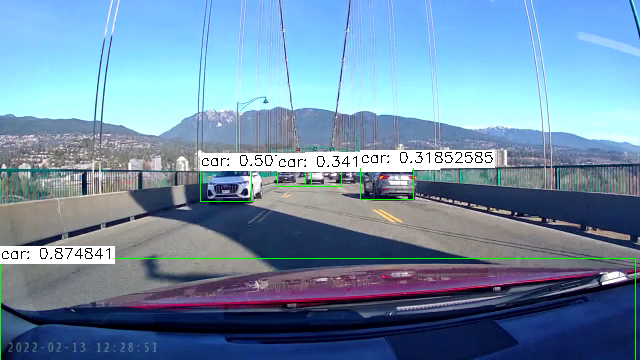

Frame: 30 / 801


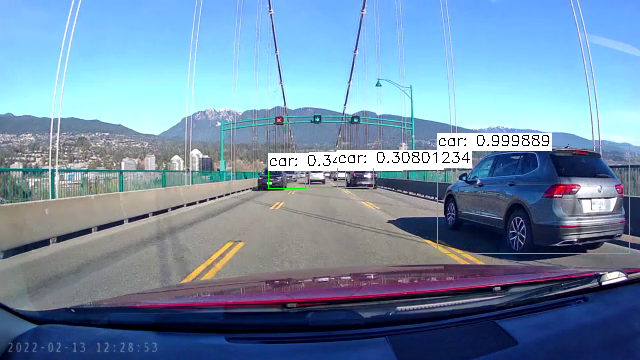

Frame: 60 / 801


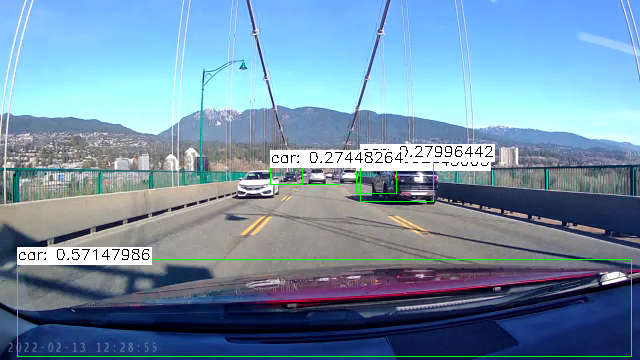

Frame: 90 / 801


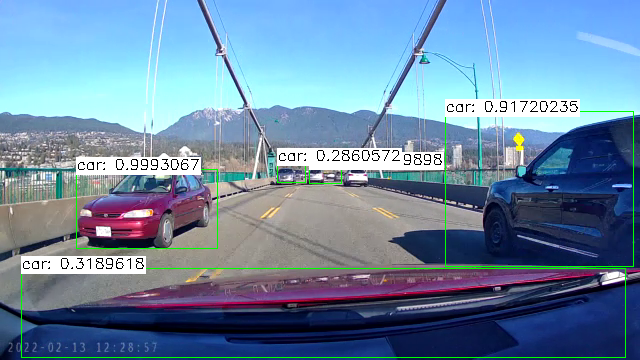

Frame: 120 / 801


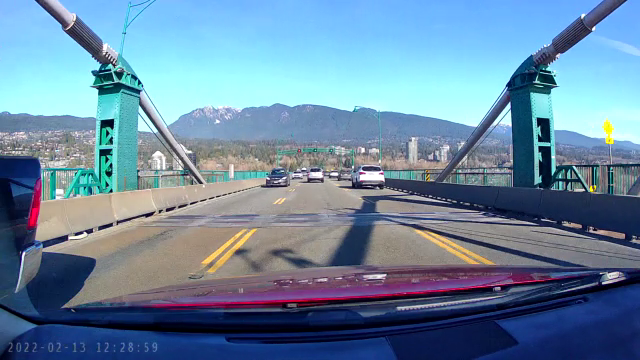

Frame: 150 / 801


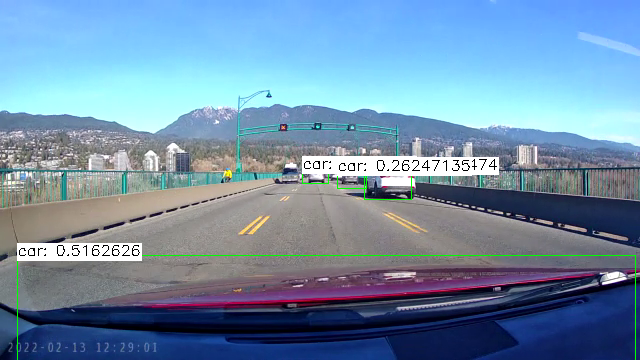

Frame: 180 / 801


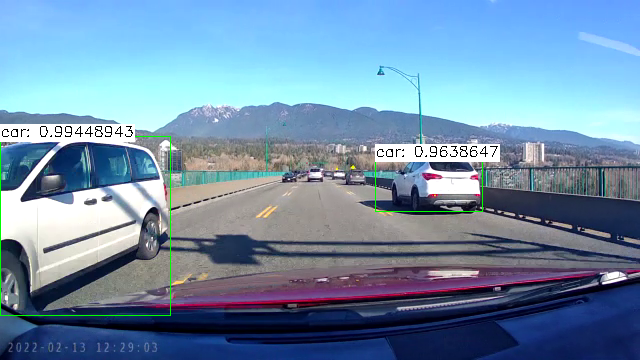

Frame: 210 / 801


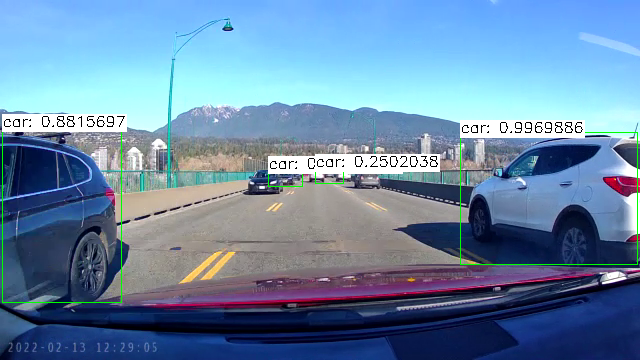

Frame: 240 / 801


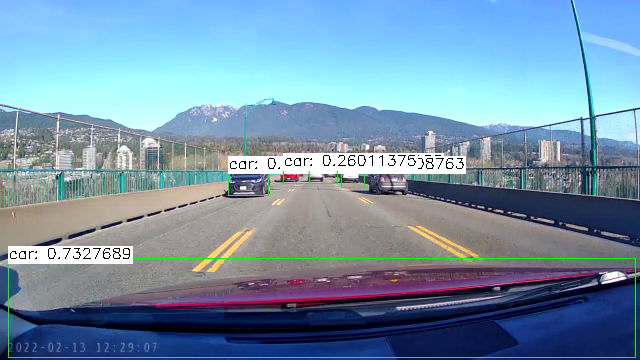

Frame: 270 / 801


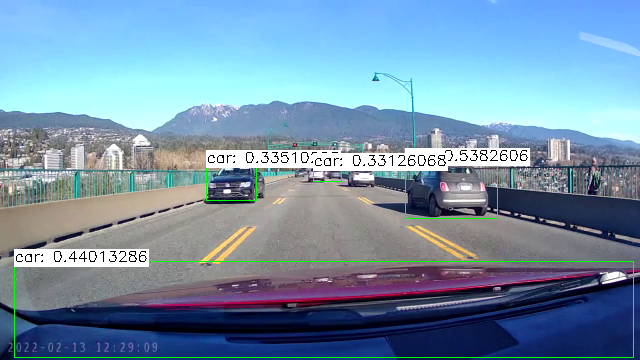

Frame: 300 / 801


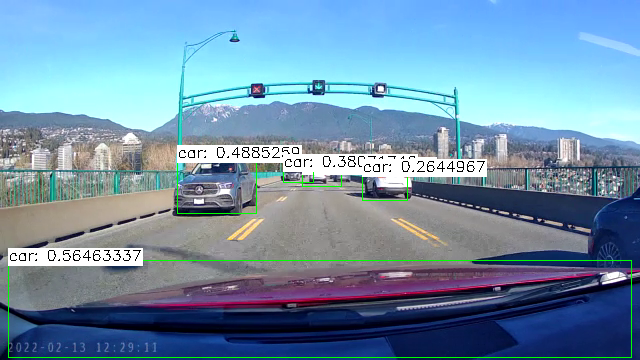

Frame: 330 / 801


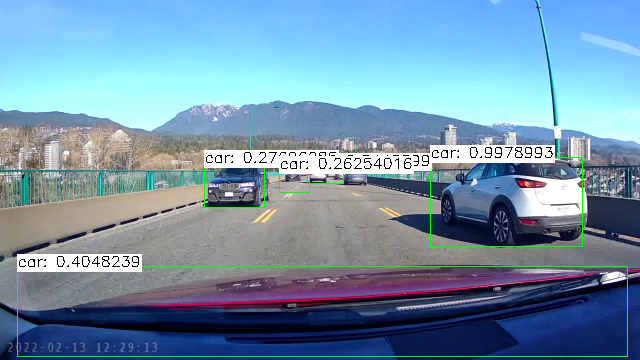

Frame: 360 / 801


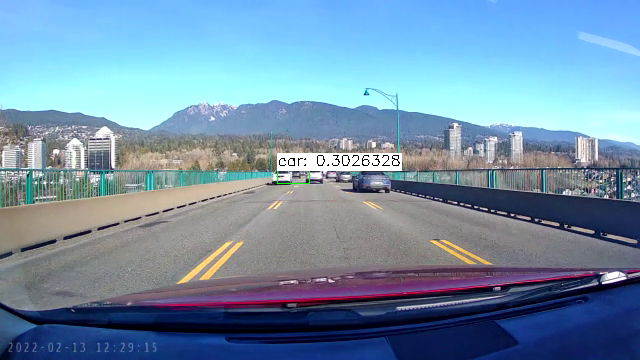

Frame: 390 / 801


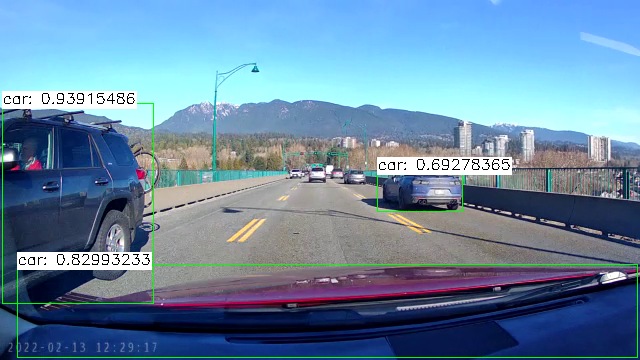

Frame: 420 / 801


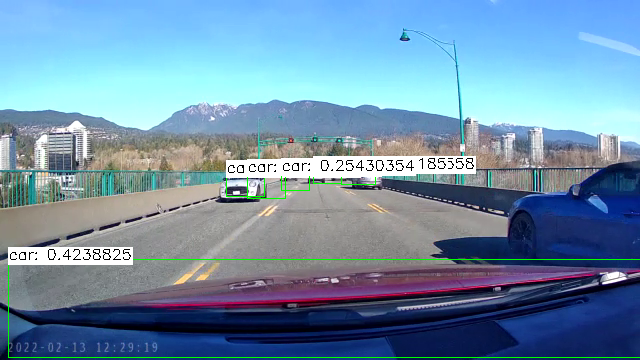

Frame: 450 / 801


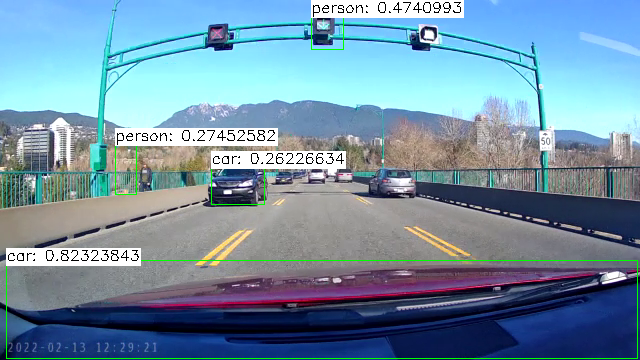

Frame: 480 / 801


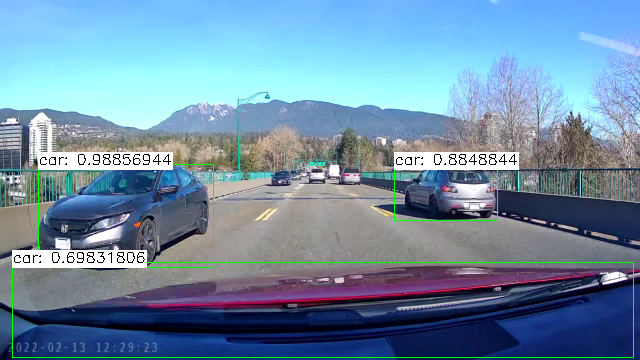

Frame: 510 / 801


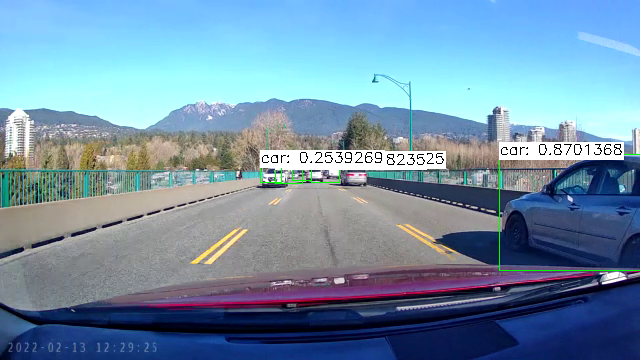

Frame: 540 / 801


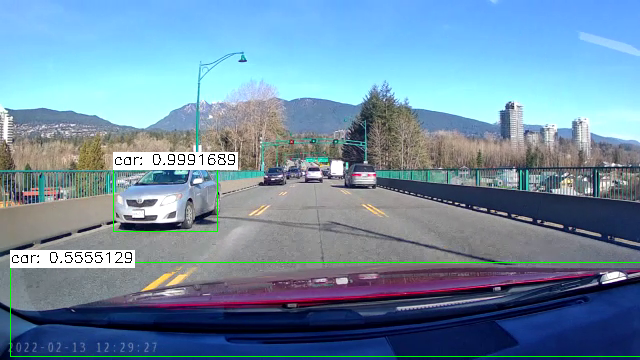

Frame: 570 / 801


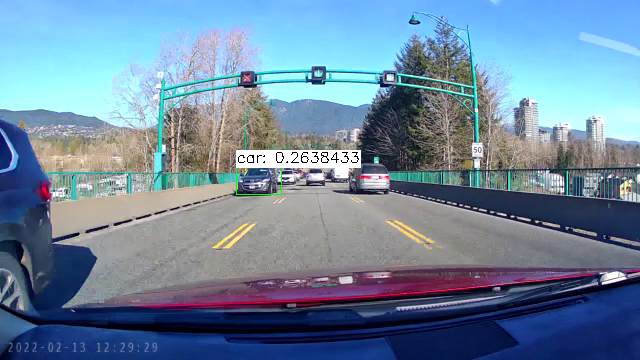

Frame: 600 / 801


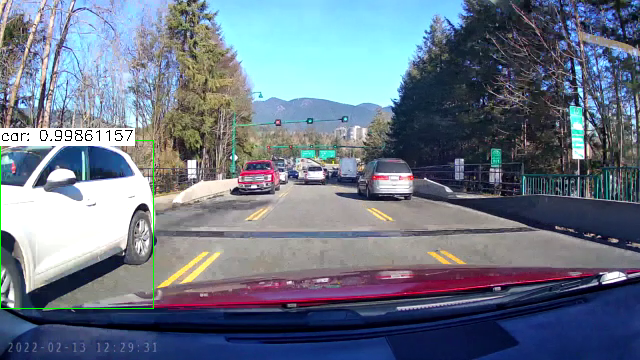

Frame: 630 / 801


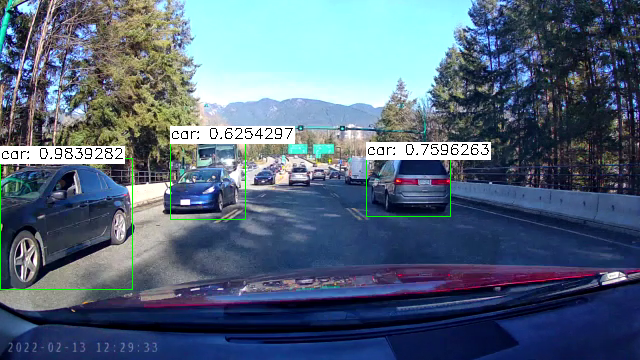

Frame: 660 / 801


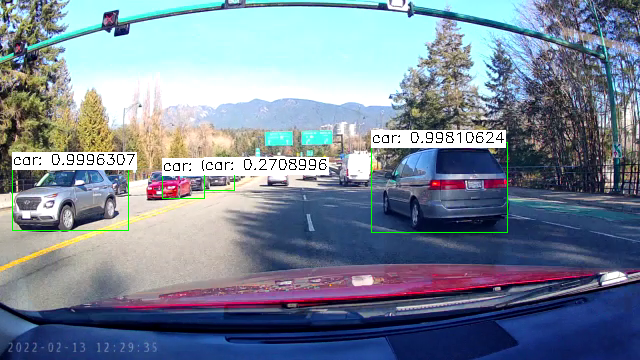

Frame: 690 / 801


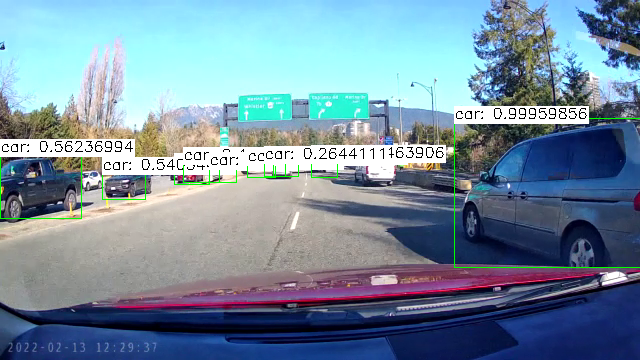

Frame: 720 / 801


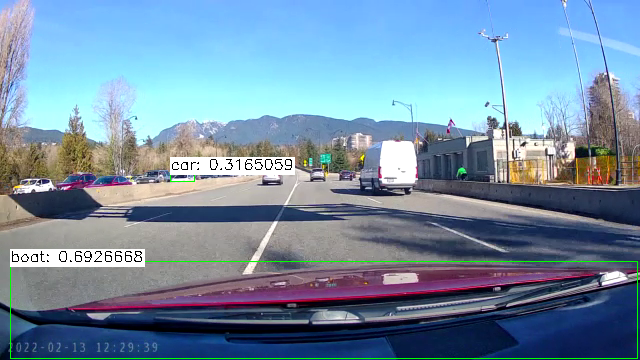

Frame: 750 / 801


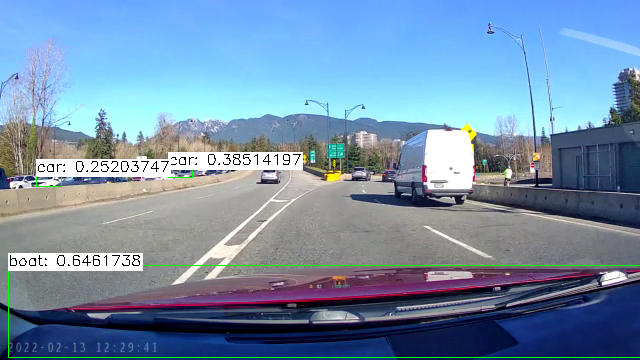

Frame: 780 / 801


In [7]:
current_frame = 0

while (current_frame < total_frames):
    # Capture frame-by-frame
    ret, frame = cap.read()
    current_frame += 1

    if current_frame % 30 == 0:
      frame_resized = cv2.resize(frame,(300,300)) # resize frame for prediction

      # MobileNet requires fixed dimensions for input image(s)
      # so we have to ensure that it is resized to 300x300 pixels.
      # set a scale factor to image because network the objects has differents size. 
      # We perform a mean subtraction (127.5, 127.5, 127.5) to normalize the input;
      # after executing this command our "blob" now has the shape:
      # (1, 3, 300, 300)
      blob = cv2.dnn.blobFromImage(frame_resized, 0.007843, (300, 300), (127.5, 127.5, 127.5), False)
      
      # Set to network the input blob 
      net.setInput(blob)
      
      # Prediction of network
      detections = net.forward()

      # Size of frame resize (300x300)
      cols = frame_resized.shape[1] 
      rows = frame_resized.shape[0]

      # For get the class and location of object detected, 
      # There is a fix index for class, location and confidence
      # value in @detections array .
      for i in range(detections.shape[2]):
          confidence = detections[0, 0, i, 2] #Confidence of prediction 
          if confidence > 0.2: # Filter prediction 
              class_id = int(detections[0, 0, i, 1]) # Class label

              # Object location 
              xLeftBottom = int(detections[0, 0, i, 3] * cols) 
              yLeftBottom = int(detections[0, 0, i, 4] * rows)
              xRightTop   = int(detections[0, 0, i, 5] * cols)
              yRightTop   = int(detections[0, 0, i, 6] * rows)
              
              # Factor for scale to original size of frame
              heightFactor = frame.shape[0]/300.0  
              widthFactor = frame.shape[1]/300.0 

              # Scale object detection to frame
              xLeftBottom = int(widthFactor * xLeftBottom) 
              yLeftBottom = int(heightFactor * yLeftBottom)
              xRightTop   = int(widthFactor * xRightTop)
              yRightTop   = int(heightFactor * yRightTop)
              
              # Draw location of object  
              cv2.rectangle(frame, (xLeftBottom, yLeftBottom), (xRightTop, yRightTop),
                            (0, 255, 0))

              # Draw label and confidence of prediction in frame resized
              if class_id in classNames:
                  label = classNames[class_id] + ": " + str(confidence)
                  labelSize, baseLine = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)

                  yLeftBottom = max(yLeftBottom, labelSize[1])
                  cv2.rectangle(frame, (xLeftBottom, yLeftBottom - labelSize[1]),
                                      (xLeftBottom + labelSize[0], yLeftBottom + baseLine),
                                      (255, 255, 255), cv2.FILLED)
                  cv2.putText(frame, label, (xLeftBottom, yLeftBottom),
                              cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))
          
      cv2_imshow(frame)
      print(f'Frame: {current_frame} / {total_frames}')